# Logistic Regression

Produces results in binary format which is used to predict the outcome of a categorical dependent variable. The outcome should be discrete/categorical. (0 or 1 | Yes or No | True or False | High or Low )

<img src="images/log_reg_1.png">

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Titanic Analysis

### Load data

In [46]:
titanic_data = pd.read_csv("files/titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [47]:
data_counter = len(titanic_data.index)
print(data_counter)
titanic_data.info()

891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analyze Data

<Axes: xlabel='Survived', ylabel='count'>

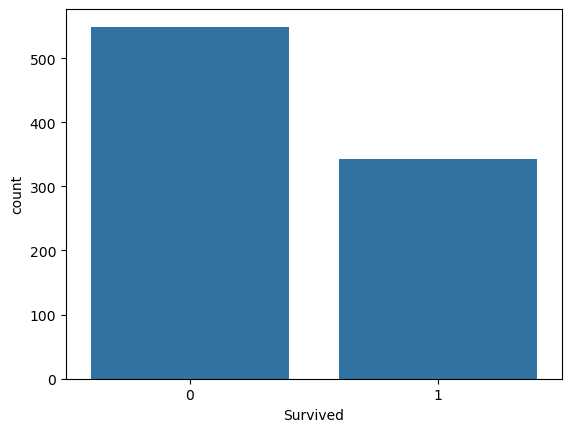

In [48]:
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

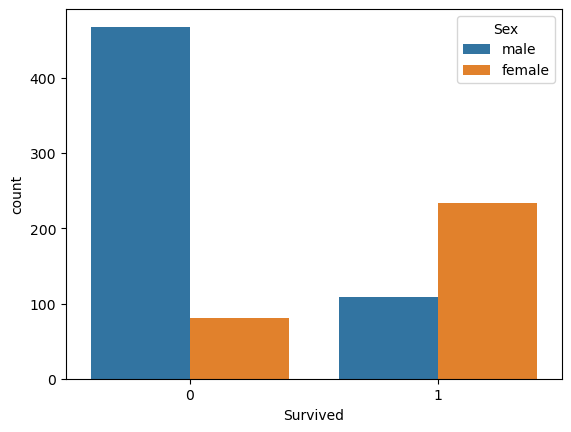

In [49]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

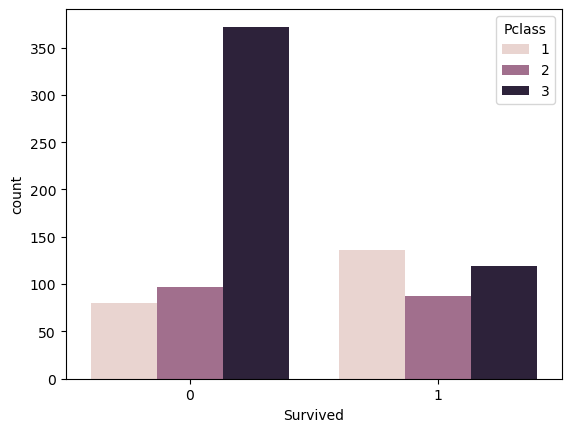

In [50]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<Axes: title={'center': 'Age Frequency'}, ylabel='Frequency'>

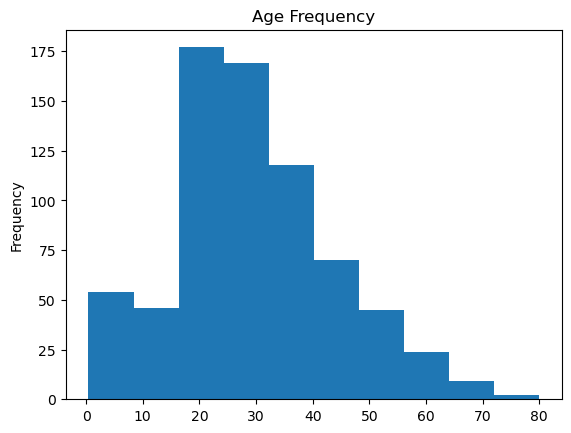

In [51]:
# Age distribution
titanic_data["Age"].plot.hist(title="Age Frequency")

<Axes: title={'center': 'Fare Frequency'}, ylabel='Frequency'>

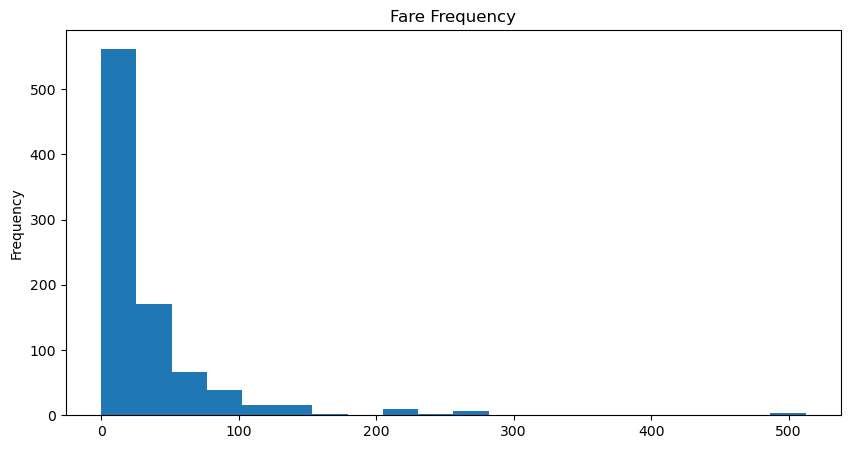

In [52]:
# Fare Distribution
titanic_data["Fare"].plot.hist(title="Fare Frequency", bins=20, figsize=(10, 5))

<Axes: xlabel='SibSp', ylabel='count'>

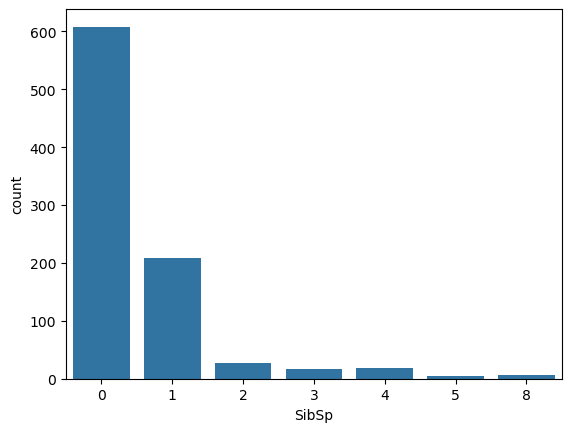

In [53]:
# Sibling or spouse count
sns.countplot(x="SibSp", data=titanic_data)

<Axes: xlabel='Parch', ylabel='count'>

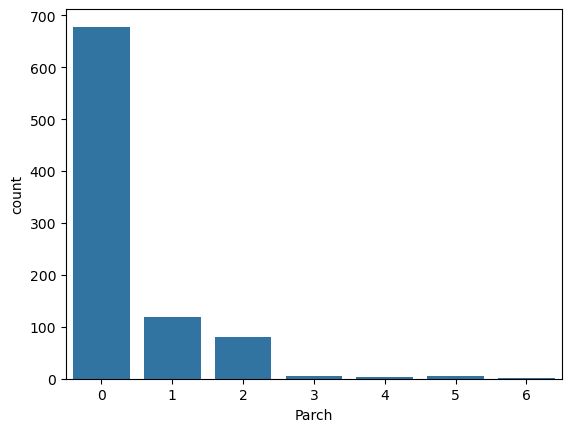

In [54]:
# Parents or children count
sns.countplot(x="Parch", data=titanic_data)

### Data Wrangling (Data cleanup)

In [55]:
titanic_data.isnull() # Checks for the null or nan values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
# Get the sum of the null data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

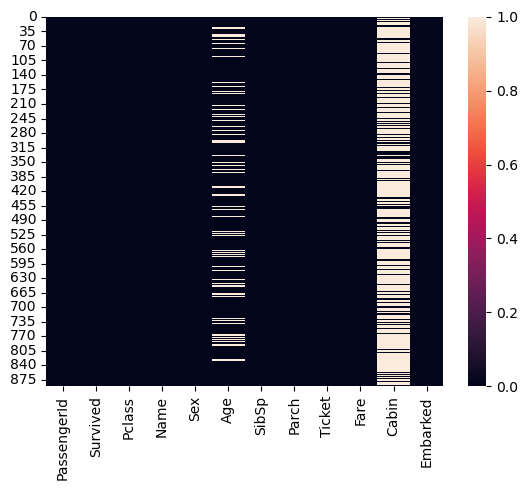

In [57]:
# Heat map for the missing values
sns.heatmap(titanic_data.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

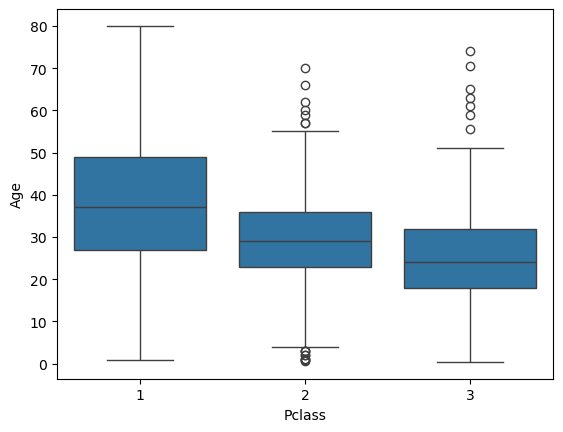

In [58]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)
# Passengers traveling w/ first class tend to be older than the other classes

#### Drop the columns w/ missing data significantly

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [62]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
# Drop all null values
titanic_data.dropna(inplace=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

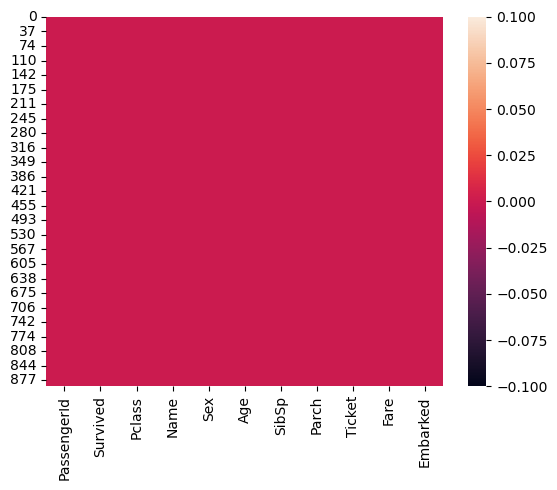

In [65]:
# Check the heat map
sns.heatmap(titanic_data.isnull())
titanic_data.isnull().sum()

### Convert data to categories
One can use pandas get_dummies function to categorize

In [66]:
sex = pd.get_dummies(titanic_data["Sex"])
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [68]:
# No need to keep both columns
sex_data = pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex_data.head()

,male
0,True
1,False
2,False
3,False
4,True


In [70]:
embark = pd.get_dummies(titanic_data["Embarked"])
embark.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [71]:
# Two columns are enough two categorize
embark_data = pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark_data.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [72]:
# Similarly for passenger class
pclass_data = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
pclass_data.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [73]:
# Now concatanete
titanic_data = pd.concat([titanic_data, sex_data, embark_data, pclass_data], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [74]:
# Now we can drop pclass, sex and embark column and other unused
titanic_data.drop(["Pclass", "Name", "Sex", "PassengerId", "Ticket", "Embarked"], axis=1, inplace=True)

In [75]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


### Extract Data

In [77]:
# Independent variables other than Survived
x_data = titanic_data.drop("Survived", axis=1)
# Dependent variable that we try to predict
y_data = titanic_data["Survived"]

### Split Data

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)
# random_state = 1 --> it will generate same train and test data each time

In [82]:
x_train.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
699,42.0,0,0,7.650,True,False,True,False,True
642,2.0,3,2,27.900,False,False,True,False,True
434,50.0,1,0,55.900,True,False,True,False,False
203,45.5,0,0,7.225,True,False,False,False,True
586,47.0,0,0,15.000,True,False,True,True,False


In order to train the data properly, the column headers should be string type so fix them first.

In [87]:
x_train.rename(columns={2:"2", 3:"3"})
x_test.rename(columns={2:"2", 3:"3"})



# x_train.columns = x_train.columns.astype(str)
# x_test.columns = x_test.columns.astype(str)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
689,15.0,0,1,211.3375,False,False,True,False,False
279,35.0,1,1,20.2500,False,False,True,False,True
508,28.0,0,0,22.5250,True,False,True,False,True
9,14.0,1,0,30.0708,False,False,False,True,False
496,54.0,1,0,78.2667,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
854,44.0,1,0,26.0000,False,False,True,True,False
336,29.0,1,0,66.6000,True,False,True,False,False
385,18.0,0,0,73.5000,True,False,True,True,False
397,46.0,0,0,26.0000,True,False,True,True,False


### Generate the model and train

In [89]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=300)
log_reg_model = log_reg_model.fit(x_train, y_train)

### Predict

In [90]:
y_pred = log_reg_model.predict(x_test)

### Evaluate Results

In [91]:
from sklearn.metrics import classification_report

In [93]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, y_pred)

array([[102,  24],
       [ 25,  63]])

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test, y_pred)

0.7710280373831776

## SUV Market Analysis

### Load data

In [98]:
suv_data = pd.read_csv("files/suv_data.csv")
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### Extract Data

In [99]:
x_data = suv_data.iloc[:, [2,3]].values
y_data = suv_data.iloc[:, 4].values

### Split Data

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)
# You can scale your values for better performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Generate model and train

In [103]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model = log_reg_model.fit(x_train, y_train)

### Predict

In [104]:
y_pred = log_reg_model.predict(x_test)

### Evaluate Results

In [105]:
accuracy_score(y_test, y_pred)

0.86